#  Notebook 1: Introducing key libraries in Python and exploratory analysis on the Platypus VGM object

## Table of Contents
* [**Introduction**](#chapter1)



* [**Loading the VGM object**](#chapter2)



* [**VDJ analyses**](#chapter3)

    * [Data wrangling using *Pandas*](#section_3_1)
    * [Fast computation of clonal expansion using *NumPy*](#section_3_2)
    * [Creating clonal expansion bar plots using *Matplotlib*](#section_3_3)
    * [Clonal lineage inference using *Biopython* and PHYLIP](#section_3_4)
    * [Converting a lineage into a network using *networkx*](#section_3_5)
    * [Creating sequence similarity networks using *networkx*](#section_3_6)
    * [Using *bionumpy* for quickly calculating kmer frequencies](#section_3_7)
    * [Clustering and projection using *scikit-learn*](#section_3_8)
    * [Training baseline ML models using *scikit-learn*](#section_3_9)
    
    
    
* [**GEX analyses**](#chapter4)

    * [Sample GEX analyses using *Scanpy*](#section_4_1)
    * [Creating RNA velocity plots](#section_4_2)
    * [Integrating VDJ information ](#section_4_3)
        

Imports check

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Introduction <a class="anchor" id="chapter1"></a>

This notebook is aimed at introducing Python and some commonly used libraries, especially for users familiar with R and the Platypus computational immunology ecosystem. We will take a look at the VGM object and how to convert it to a Python-viable representation, some sample analyses using popular libraries such as NumPy, Pandas, scikit-learn, and gain some insight into useful programming practices and Python code readability. 

You will first need to get familiar with the Platypus computational immunology ecosystem and the VGM object. We recommend following the introductory vignette (https://alexyermanos.github.io/Platypus/articles/quickstart.html) and the vignette that goes more in-depth into the VGM object (https://alexyermanos.github.io/Platypus/articles/vgm_overview.html) before starting this set of tutorials.

## Loading the VGM object <a class="anchor" id="chapter2"></a>

We will first load a VGM object (saved as an RDS file) inside our Jupyter Notebook. We will make use of the rpy2 Python library, which is installed by default in the platypus_python environment. This allows interacting with R code inside the Jupyter Notebook cells.
There are other methods to import an R object inside Python - we could have, for example, saved our VDJ part of the VGM object as a CSV file, and convert the Seurat object into AnnData (for Scanpy), as done here https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html, https://satijalab.org/seurat/archive/v2.4/conversion_vignette.html.

We will describe both methods of importing a VGM object into a Jupyter Notebook.

a) Loading the VGM object inside our notebook: **TO DO**

In [2]:
import scanpy as sc
import numpy as np

from rpy2.robjects import pandas2ri
import anndata2ri

In [3]:
%load_ext rpy2.ipython

sc.settings.verbosity = 3
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.4.0
anndata2ri                  1.1
appnope                     0.1.3
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.6
decorator                   5.1.1
defusedxml                  0.7.1
executing                   1.2.0
h5py                        3.8.0
igraph                      0.10.4
ipykernel                   6.21.1
ipython_genutils            0.2.0
jedi                        0.18.2
jinja2                      3.1.2
joblib                      1.2.0
kiwisolver                  1.4.4
llvmlite                    0.39.1
louvain                     0.8.0
markupsafe                  2.1.2
matplotlib                  3.6.3
mpl_toolkits                NA
natsort                     8.2.0
netwo

In [237]:
%%R
# Load PBMC dataset from Seurat tutorial
VGM <- readRDS('/Users/tudorcotet/Desktop/Report analyses/data/tnfr2_s1.rds')
# Initialize the Seurat object with the raw (non-normalized data).

In [238]:
pandas2ri.activate()

In [239]:
%%R -o VDJ
VDJ <- VGM[[1]]

In [423]:
VDJ

,barcode,sample_id,group_id,clonotype_id_10x,celltype,Nr_of_VDJ_chains,Nr_of_VJ_chains,VDJ_cdr3s_aa,VJ_cdr3s_aa,VDJ_cdr3s_nt,...,orig_barcode_GEX,seurat_clusters,PC_1,PC_2,UMAP_1,UMAP_2,tSNE_1,tSNE_2,batches,clonotype_id
1,s1_AAACCTGAGCAGATCG-1,s1,1,clonotype4,B cell,1,1,CARDDGYYPYYFDYW,CQQSNEDPYTF,TGTGCAAGAGATGATGGTTACTACCCCTACTACTTTGACTACTGG,...,AAACCTGAGCAGATCG,2,3.830999,4.013449,1.708646,-1.231708,6.294744,14.631589,Unspecified,clonotype4
2,s1_AAACCTGGTCCTCTTG-1,s1,1,clonotype2,B cell,1,1,CMRYGSSYWYFDVW,CLQHGESPYTF,TGTATGAGATACGGTAGTAGCTACTGGTACTTCGATGTCTGG,...,AAACCTGGTCCTCTTG,2,1.745734,1.107205,-1.278047,-1.928787,-2.114616,-7.966392,Unspecified,clonotype2
3,s1_AAACCTGGTTGTCGCG-1,s1,1,clonotype3,B cell,1,1,CMRYSNYWYFDVW,CLQHGESPYTF,TGTATGAGATATAGTAACTACTGGTACTTCGATGTCTGG,...,AAACCTGGTTGTCGCG,2,-1.171262,2.361560,0.191142,-1.070098,-1.139046,2.580705,Unspecified,clonotype3
4,s1_AAACCTGTCCTTGCCA-1,s1,1,clonotype3,B cell,1,1,CMRYSNYWYFDVW,CLQHGESPYTF,TGTATGAGATATAGTAACTACTGGTACTTCGATGTCTGG,...,AAACCTGTCCTTGCCA,4,2.088069,4.797103,2.225504,-2.043269,13.519462,15.734623,Unspecified,clonotype3
5,s1_AAACCTGTCTACCAGA-1,s1,1,clonotype223,B cell,1,1,CAREEANWAWFAYW,CQQSNEDPYTF,TGTGCAAGAGAAGAGGCCAACTGGGCCTGGTTTGCTTACTGG,...,AAACCTGTCTACCAGA,6,-9.001430,-1.492601,-2.260681,7.064983,1.753493,-23.430264,Unspecified,clonotype223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,s1_TTTGTCAGTGGGTATG-1,s1,1,clonotype68,B cell,1,1,CIDPPWFAQW,CAQNLELPYTF,TGTATAGACCCCCCCTGGTTTGCTCAGTGG,...,TTTGTCAGTGGGTATG,8,1.579789,-6.659211,-0.823250,3.835853,-26.765889,19.158934,Unspecified,clonotype68
3405,s1_TTTGTCAGTTTAGGAA-1,s1,1,clonotype28,B cell,1,1,CARHRISSTGYYAMDYW,CHQYKSYPLTF,TGTGCAAGACATAGGATATCCTCTACGGGATACTATGCTATGGACT...,...,TTTGTCAGTTTAGGAA,5,2.582768,-1.136957,1.494414,3.135940,-9.358841,29.061667,Unspecified,clonotype28
3406,s1_TTTGTCATCACGCGGT-1,s1,1,clonotype744,B cell,1,1,CATQTGQGTRTMDYW,CQHSWEVPLTF,TGTGCAACTCAGACAGGTCAGGGTACGAGGACTATGGACTACTGG,...,TTTGTCATCACGCGGT,3,1.079869,-3.668668,-4.326229,2.329781,-25.645438,2.004581,Unspecified,clonotype744
3407,s1_TTTGTCATCCCAACGG-1,s1,1,clonotype213,B cell,1,1,CAIITTVLGTDYW,CWQGTYFPWTF,TGTGCAATTATTACTACGGTCCTAGGTACGGACTACTGG,...,TTTGTCATCCCAACGG,3,0.503721,-4.872887,-3.611955,2.456077,-29.340841,2.587576,Unspecified,clonotype213


In [240]:
anndata2ri.activate()

In [241]:
%%R -o GEX
suppressPackageStartupMessages(library(Seurat))
#convert the Seurat object to a SingleCellExperiment object
GEX <- as.SingleCellExperiment(VGM[[2]])

GEX

/opt/homebrew/Caskroom/miniforge/base/envs/platypus_python/lib/python3.10/site-packages/anndata2ri/r2py.py:106: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


class: SingleCellExperiment 
dim: 31681 4260 
metadata(0):
assays(3): X logcounts scaledata
rownames(31681): XKR4 GM1992 ... AC234645.1 AC149090.1
rowData names(0):
colnames(4260): s1_AAACCTGAGACTAAGT-1 s1_AAACCTGAGCAGACTG-1 ...
  s1_TTTGTCATCCCAACGG-1 s1_TTTGTCATCGGCTACG-1
colData names(51): orig.ident nCount_RNA ... batches ident
reducedDimNames(3): PCA UMAP TSNE
mainExpName: NULL
altExpNames(0):


b) Loading a VGM object from previously saved files:

We can load the VDJ object from a previously saved CSV file by using the `read_csv` function from Pandas:

In [120]:
VDJ = pd.read_csv('./TNFR2_VDJ.csv')

/var/folders/4v/1r1vx0ws03n62xksn8vv49wr0000gn/T/ipykernel_8669/2720861177.py:1: DtypeWarning: Columns (97,101,128) have mixed types. Specify dtype option on import or set low_memory=False.
  VDJ = pd.read_csv('./TNFR2_VDJ.csv')


In [ ]:
VDJ.shape

## VDJ analyses <a class="anchor" id="chapter3"></a>



Now that we have our VDJ data frame, we can analyse it. We will first do some data wrangling and preprocessing in Pandas, then create a function using NumPy's vectorization to obtain the number of cells per clone. Later, we will use these clonal expansion counts to create bar plots and donut plots using Matplotlib.

### Wrangling the VDJ data frame using *Pandas* <a class="anchor" id="section_3_1"></a>

Next, we will take a look at the VDJ object, saved in this case as a Pandas DataFrame. We can do some basic wrangling using Pandas, such as getting the column names or subsetting to only obtain binder rows.

In [ ]:
VDJ.head() #top 5 rows in our data frame and corresponding columns

In [ ]:
VDJ_binders = VDJ.dropna(subset = ['Binders.CDR3aa']) #removing rows with NaN binder annotations - we will use this dataset downstream for our analysis

In [ ]:
VDJ_binders.shape

We can also chain operations using Pandas, akin to using the pipe operator %>% on a data frame in R. Here, we will only select cells with a single VDJ and VJ chain. We then drop the NA values and look at the top rows.

In [242]:
VDJ = VDJ[(VDJ["Nr_of_VDJ_chains"] == 1) & (VDJ["Nr_of_VDJ_chains"] == 1)].copy()

In [ ]:
VDJ.dropna(subset = ['Binders.CDR3aa']).head(5)

### Fast computation of clonal expansion using *NumPy* and *Pandas* <a class="anchor" id="section_3_2"></a>

Next, we will create a function called `get_clonal_expansion` to obtain a table of the number of cells per each clonotype (group_by parameter), per sample (sample_by parameter), as well as number of cells per given feature (feature_columns). 
Please pay attention to the naming conventions, the usage of type hints, and the comments for this function.

In [10]:
from typing import List

def get_clonal_expansion(VDJ: pd.DataFrame, 
                         feature_columns: List[str] = ['VDJ_cgene'], 
                         group_by: str = 'clonotype_id', 
                         sample_by: str = 'sample_id') -> pd.DataFrame:
    
    """
    Counts the number of cells per feature, per clonotype and returns a Pandas DataFrame object of these counts
        args:
            VDJ: pd.DataFrame 
                The VDJ object as a Pandas DataFrame
            feature_columns: List[str]
                A list of strings denoting the VDJ column for the cell counts
            group_by: str
                The grouping factor for our cell counts - defaults to 'clonotype_id': obtain counts per feature, per clonotype
            sample_by: str
                The VDJ column with the sample ids
        returns:
            pd.DataFrame
    """
    
    #We will be using a lot of vectorized operations on the NumPy arrays - for more information about vectorization, check https://towardsdatascience.com/how-to-speedup-data-processing-with-numpy-vectorization-12acac71cfca
    #This is still a naive implementation, as we will see
    
    #We will first create a new column of the combined features if len(feature_columns) > 1
    new_col = '' * len(VDJ)
    if len(feature_columns) > 1:
        for i in feature_columns:
            new_col += VDJ[i].astype(str)
            if i != feature_columns[len(feature_columns)-1]:
                new_col += ' '
                
        #Creates a new column with the pasted column name and feature values
        feature_columns = ' '.join(cols)
        VDJ[feature_columns] = new_col
    else:
        feature_columns = feature_columns[0]
    
    #Replace NA/NaN values with 'unknown'
    VDJ[feature_columns] = VDJ[feature_columns].fillna('unknown')
    
    features = VDJ[feature_columns].to_numpy()
    groups = VDJ[group_by].to_numpy()
    samples = VDJ[sample_by].to_numpy()

    
    unique_samples = np.unique(samples)
    out_dict = {sample_by: [], group_by: [], feature_columns: [], 'Cell counts': []}
    
    #We will first loop through all unique samples
    for i in unique_samples:
        subset_indices = np.where(samples == i, True, False) #get current sample ids
        subset_groups = groups[subset_indices]
        unique_groups = np.unique(subset_groups) #get unique groups per current sample
        
        for j in unique_groups:
            more_indices = np.where(np.logical_and(samples == i, groups == j), True, False) #get joint current sample-group ids
            subset_features = features[more_indices] #get current feature values
            out_feats, out_counts = np.unique(subset_features, return_counts = True) #count the unique number of features per group
            
            out_samples = [i] * len(out_feats)
            out_groups = [j] * len(out_feats)
            
            #Append all to output dictionary (which we will convert into a Pandas DataFrame)
            out_dict[sample_by].extend(out_samples)
            out_dict[group_by].extend(out_groups)
            out_dict[feature_columns].extend(out_feats.tolist())
            out_dict['Cell counts'].extend(out_counts.tolist())

    out_df = pd.DataFrame.from_dict(out_dict)       
    return out_df

We have also implemented a version making use of Pandas, the `groupby` method, and vectorized operations on the data frame:

In [11]:
def get_clonal_expansion_pd(VDJ: pd.DataFrame, 
                            feature_columns: List[str] = ['VDJ_cgene'], 
                            group_by: str = 'clonotype_id', 
                            sample_by: str = 'sample_id') -> pd.DataFrame:
    
    """
    Counts the number of cells per feature, per clonotype and returns a Pandas DataFrame object of these counts
        args:
            VDJ: pd.DataFrame 
                The VDJ object as a Pandas DataFrame
            feature_columns: List[str]
                A list of strings denoting the VDJ column for the cell counts
            group_by: str
                The grouping factor for our cell counts - defaults to 'clonotype_id': obtain counts per feature, per clonotype
            sample_by: str
                The VDJ column with the sample ids
        returns:
            pd.DataFrame
    """
    
    #We will first create a new column of the combined features if len(feature_columns) > 1
    new_col = '' * len(VDJ)
    if len(feature_columns) > 1:
        for i in feature_columns:
            new_col += VDJ[i].astype(str)
            if i != feature_columns[len(feature_columns)-1]:
                new_col += ' '
    
        feature_columns = ' '.join(cols)
        VDJ[feature_columns] = new_col
    else:
        feature_columns = feature_columns[0]
    
    #Replace NA/NaN values with 'unknown'
    VDJ[feature_columns] = VDJ[feature_columns].fillna('unknown').tolist()
    
    #We have used the Pandas groupby method to group our VDJ by sample, clonotypes, and features (and then count the number of rows)
    groups = [sample_by, group_by, feature_columns]
    out_df = VDJ.groupby(groups, as_index=False).size()
    out_df.columns = [*out_df.columns[:-1], 'Cell counts']

    return out_df

In [ ]:
#%timeit get_clonal_expansion(VDJ)

In [13]:
%timeit get_clonal_expansion_pd(VDJ)

2.88 ms ± 72.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
expansion_df = get_clonal_expansion_pd(VDJ)

### Creating clonal expansion bar plots using *Matplotlib* <a class="anchor" id="section_3_3"></a>

We will next create a function for clonal bar plots using the counts we previously determined. We will make use of the Matplotlib Python library for general plotting - we recommend that you check its documentation and series of vignettes/tutorials https://matplotlib.org/stable/gallery/index.html.

In [13]:
from typing import Dict
import matplotlib.colors as mcolors
from operator import itemgetter


def plot_clonal_expansion(expansion_df: pd.DataFrame,
                          max_clones: int = 50,
                          color_dict: Dict or None = None) -> None:
    
    """
    Counts the number of cells per feature, per clonotype and returns a Pandas DataFrame object of these counts
        args:
            expansion_df: pd.DataFrame 
                The data frame with cell counts per feature, clonotype, and sample, obtained from the get_clonal_expansion function
            color_dict: Dict
                A dictionary of feature names - keys and colors - values for the bar plot
            
        returns:
            None
    """
    
    sample, group, feature, counts = expansion_df.columns
    
    unique_samples = np.unique(expansion_df[sample])
    
    if color_dict is None:
        unique_features = np.unique(expansion_df[feature])
        colors = list(mcolors.TABLEAU_COLORS.values())[:len(unique_features)]

        color_dict = dict(zip(unique_features, colors))
        
    
    for i in unique_samples:
        
        #Subset the df for each sample
        df_subset = expansion_df[expansion_df[sample] == i].copy()
        
        #Get a total expansion column (all cells per features summed)
        exp = df_subset.groupby(group)[counts].transform('sum').tolist()
        df_subset['Total expansion'] = exp
        df_subset = df_subset.sort_values(by=['Total expansion'], ascending = False)
        
        #Obtain unique ranks per clonotype given the df sorted by total expansion
        unique_groups = pd.unique(df_subset[group])
        ranks = list(range(1, len(unique_groups) + 1))
        rank_dict = dict(zip(unique_groups.tolist(), ranks))
        df_subset['Rank'] = itemgetter(*df_subset[group].tolist())(rank_dict)
        
        #Subselect the maximum number of clones per plot (number of bars)
        if(len(ranks) > max_clones):
            df_subset = df_subset[df_subset['Rank'] <= max_clones]
        
        #Pivot the df to obtain rows = clones and columns = features, with values = counts
        pivoted = df_subset.pivot(index = "Rank", columns = feature, values = counts).reset_index()
        df = pivoted.drop('Rank', axis = 1).dropna(axis = 1, how = 'all').fillna(0)
        df = df.sort_index(key = df.sum(axis = 1).get, ascending = False).reset_index()
        
        #Select the data frame features in the final bar chart
        feats = list(df.columns.values)
        feats = feats[1:(len(feats)+1)]
        
        
        fig, ax = plt.subplots()
        
        #Creating the first layer of the stacked bar plot
        ax.bar(df.index, df[feats[0]], label = feats[0], color = color_dict[feats[0]])
        bottom = 0
        
        #Creating the stacked bar plot by looping through all feature roes
        for j in range(len(feats)-1):
            bottom += df[feats[j]]
            ax.bar(df.index, df[feats[j+1]], label = feats[j+1], bottom = bottom, color = color_dict[feats[j+1]])

        # Adding axis labels, legend, and title
        xt = np.arange(0, np.max(df.index), 5)
        plt.xticks(xt)
        ax.set_xticklabels(xt, rotation = 45)
        ax.set_ylabel("Cell counts")
        ax.set_xlabel("Rank")
        plt.title(i)
        ax.legend(title = feature)
        
        plt.show()
     
    

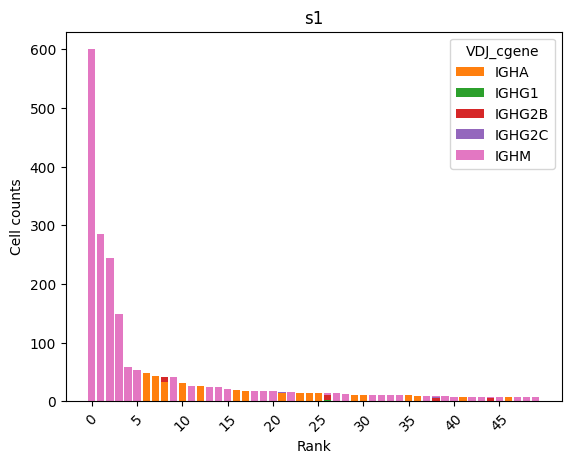

In [14]:
plot_clonal_expansion(expansion_df)

### Creating clonal expansion donut plots using *Matplotlib* <a class="anchor" id="section_3_3"></a>

In [15]:
from typing import Dict
import matplotlib.colors as mcolors
from operator import itemgetter


def plot_clonal_donut(expansion_df: pd.DataFrame,
                      max_clones: int = 20,
                      color_dict: Dict or None = None) -> None:
    
    """
    Counts the number of cells per feature, per clonotype and returns a Pandas DataFrame object of these counts
        args:
            expansion_df: pd.DataFrame 
                The data frame with cell counts per feature, clonotype, and sample, obtained from the get_clonal_expansion function
            color_dict: Dict
                A dictionary of feature names - keys and colors - values for the bar plot
            
        returns:
            None
    """
    
    sample, group, feature, counts = expansion_df.columns
    
    unique_samples = np.unique(expansion_df[sample])
    
    if color_dict is None:
        unique_features = np.unique(expansion_df[feature])
        colors = list(mcolors.TABLEAU_COLORS.values())[:len(unique_features)]
        color_dict = dict(zip(unique_features, colors))
        
    
    for i in unique_samples:
        
        #Subset the df for each sample
        df_subset = expansion_df[expansion_df[sample] == i].copy()
        
        #Get a total expansion column (all cells per features summed)
        exp = df_subset.groupby(group)[counts].transform('sum').tolist()
        df_subset['Total expansion'] = exp
        df_subset = df_subset.sort_values(by=['Total expansion'], ascending = False)
        
        #Obtain unique ranks per clonotype given the df sorted by total expansion
        unique_groups = pd.unique(df_subset[group])
        ranks = list(range(1, len(unique_groups) + 1))
        rank_list = dict(zip(unique_groups.tolist(), ranks))
        df_subset['Rank'] = itemgetter(*df_subset[group].tolist())(rank_list)
        
        #Subselect the maximum number of clones per plot (number of bars)
        if(len(ranks) > max_clones):
            df_subset = df_subset[df_subset['Rank'] <= max_clones]
        
        #Pivot the df to obtain rows = clones and columns = features, with values = counts
        pivoted = df_subset.pivot(index = "Rank", columns = feature, values = counts).reset_index()
        df = pivoted.drop('Rank', axis = 1).dropna(axis = 1, how = 'all').fillna(0)
        df = df.sort_index(key = df.sum(axis = 1).get, ascending = False).reset_index()
        
        #Select the data frame features in the final bar chart
        feats = list(df.columns.values)
        feats = feats[1:(len(feats)+1)]
        
        df = df.iloc[:, 1:]
        
        main_cols = [plt.cm.Greens(i) for i in np.linspace(1,0,df.shape[0])]
        final_feats = feats * df.shape[0]
        final_vals = df.to_numpy().flatten().tolist()
        #return final_feats, final_vals
        fig, ax = plt.subplots()
        ax.axis('equal')
        p, _ = ax.pie(df.sum(axis=1), radius = 2, colors = main_cols, wedgeprops = {'linewidth': 1.5})
        plt.setp(p, width=0.5, edgecolor='white')
        p2, text = ax.pie(final_vals, labels = final_feats, radius = 2-0.5, colors = itemgetter(*final_feats)(color_dict), wedgeprops = {'linewidth': 1.5})
        plt.setp(p2, width=0.4, edgecolor='white')

        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), loc = 'center')
        
        for t in text: 
            t.remove()
        plt.title(i, y = 0.8)

        plt.show()
     
    

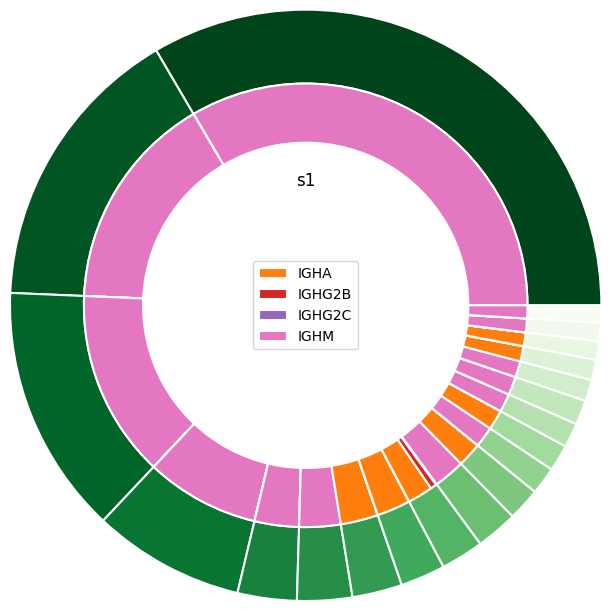

In [16]:
plot_clonal_donut(expansion_df)


In [ ]:
def calculate_levenshtein_naive:
    

In [ ]:
def calculate_levenshtein_optimized:

In [ ]:
def starmap_levenshtein:
    

In [ ]:
def list_levenshtein:
    

In [ ]:
def get_lineage_dataframes:

In [ ]:
def create_antibodyforests_lineage:

In [ ]:
def parallel_antibodyforests:

In [ ]:
def create_phylip_lineage:

In [ ]:
def create_sequence_similarity_network:

In [ ]:
def plot_network:

In [ ]:
def node_metrics:

In [ ]:
def node_metrics_violin_plot:

In [ ]:
def calculate_kmers:

In [ ]:
def create_kmer_features: #per sample or per clonotype

In [ ]:
def cluster_kmers:

In [ ]:
def kmer_heatmap(metric = 'euclidean'):
    #using scipy pdist, distance metrics on kmer vectors.

In [17]:
from numba import njit
import Levenshtein

def lv(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    return distances[len(token1)][len(token2)]


@njit
def lv_jit(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    return distances[len(token1)][len(token2)]


def lv_optim(token1, token2):
    return Levenshtein.distance(token1, token2)


In [18]:
%timeit lv(VDJ['VDJ_sequence_nt_raw'][100], VDJ['VDJ_sequence_nt_raw'][1000])

598 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit lv_jit(VDJ['VDJ_sequence_nt_raw'][100], VDJ['VDJ_sequence_nt_raw'][1000])

123 ms ± 842 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%timeit lv_optim(VDJ['VDJ_sequence_nt_raw'][100], VDJ['VDJ_sequence_nt_raw'][1000])

7.48 µs ± 63.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
from multiprocess import Pool, cpu_count
from itertools import combinations, combinations_with_replacement

def list_lv(sequences, levenshtein):
    vals = [levenshtein(i, j) for (i, j) in combinations_with_replacement(sequences, 2)]
    
    out_mat = np.zeros((len(sequences), len(sequences)))
    inds = np.triu_indices_from(out_mat, k = 0)
    out_mat[inds] = vals[:]
    out_mat[(inds[1], inds[0])] = vals[:]
    return out_mat

def parallel_lv(sequences, levenshtein, nproc = cpu_count()):
    pool = Pool(processes = nproc)
    vals = pool.starmap(levenshtein, combinations_with_replacement(sequences, 2))
    
    out_mat = np.zeros((len(sequences), len(sequences)))
    inds = np.triu_indices_from(out_mat, k = 0)
    out_mat[inds] = vals[:]
    out_mat[(inds[1], inds[0])] = vals[:]
    return out_mat

In [22]:
sequences = np.unique(VDJ['VDJ_cdr3s_aa']).tolist()

In [23]:
A = list_lv(sequences, lv_optim)

In [234]:
from functools import partial
distance_function = partial(list_lv, levenshtein = lv_optim)

array([[ 0.,  6.,  4., ..., 13.,  7.,  7.],
       [ 6.,  0.,  7., ..., 10.,  5.,  6.],
       [ 4.,  7.,  0., ..., 13.,  8.,  8.],
       ...,
       [13., 10., 13., ...,  0.,  9.,  9.],
       [ 7.,  5.,  8., ...,  9.,  0.,  4.],
       [ 7.,  6.,  8., ...,  9.,  4.,  0.]])

In [78]:
%timeit list_lv(sequences, lv_optim)

264 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit parallel_lv(sequences, lv_optim)

In [ ]:
def get_full_mixcr(VDJ, 
                   chain_to_extract = ['VDJ', 'VJ'], 
                   as_nucleotide = T, 
                   regions_to_extract = ['FR1', 'CDR1', 'FR2', 'CDR2', 'FR3', 'CDR3', 'FR4']):
    
    
    
    
    return VDJ

In [ ]:
def get_mixcr_germline():
    
    return

In [ ]:
def create_antibodyforests_lineage(df, dist_fun, ):
    
    return

In [ ]:
def create_sequence_similarity_network(df):
    
    return

In [ ]:
def adjacency_matrix_prune(mat, df):
    
    return

In [ ]:
def adjacency_matrix_tree(mat, df):
    
    return

In [80]:
VDJ[(VDJ['sample_id'] == 's1') & (VDJ['clonotype_id'] == 'clonotype1')]

,barcode,sample_id,group_id,clonotype_id_10x,celltype,Nr_of_VDJ_chains,Nr_of_VJ_chains,VDJ_cdr3s_aa,VJ_cdr3s_aa,VDJ_cdr3s_nt,...,orig_barcode_GEX,seurat_clusters,PC_1,PC_2,UMAP_1,UMAP_2,tSNE_1,tSNE_2,batches,clonotype_id
23,s1_AAAGTAGCATGGGAAC-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,AAAGTAGCATGGGAAC,1,0.705604,7.464052,2.077055,-6.025063,32.746139,-7.765083,Unspecified,clonotype1
24,s1_AAAGTAGGTTCTGAAC-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,AAAGTAGGTTCTGAAC,1,0.936684,6.671649,2.619106,-5.991322,33.471931,0.372150,Unspecified,clonotype1
27,s1_AAATGCCTCGCATGAT-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,AAATGCCTCGCATGAT,1,4.373576,5.269565,0.036671,-3.402326,19.840887,-8.541071,Unspecified,clonotype1
34,s1_AACACGTTCTGGTGTA-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,AACACGTTCTGGTGTA,1,-0.373507,4.450673,1.467358,-5.790558,31.703559,-4.315308,Unspecified,clonotype1
44,s1_AACCATGTCACGACTA-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,AACCATGTCACGACTA,1,2.943946,2.131854,0.267753,-3.161227,19.134128,-7.435562,Unspecified,clonotype1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s1_TTTATGCGTTCACGGC-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,TTTATGCGTTCACGGC,1,6.860945,6.408084,1.130585,-3.454353,21.721623,-6.071580,Unspecified,clonotype1
3378,s1_TTTATGCTCTGCTGCT-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,TTTATGCTCTGCTGCT,1,2.814518,3.795376,0.135860,-3.247967,19.433980,-8.158821,Unspecified,clonotype1
3395,s1_TTTGGTTGTGTTTGGT-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,TTTGGTTGTGTTTGGT,1,0.829077,4.203963,0.283348,-4.878404,10.900729,-18.508167,Unspecified,clonotype1
3396,s1_TTTGGTTTCAGCATGT-1,s1,1,clonotype1,B cell,1,1,CARDLDYFDYW,CLQGTHQPRTF,TGTGCAAGAGATCTGGACTACTTTGACTACTGG,...,TTTGGTTTCAGCATGT,1,-0.767162,6.106823,2.696900,-5.738123,34.887813,-1.710774,Unspecified,clonotype1


In [29]:
def get_sample_dataframes(VDJ, specific_samples = None):
    
    
    if specific_samples == 'grouped':
        out_dict = {'grouped': VDJ}
        
        return out_dict
    
    if specific_samples is not None:
        if isinstance(specific_samples[0], str) is False:
            raise TypeError('Unrecognized type for specific_lineages: list of str ')
        
    else:
        specific_samples = np.unique(VDJ['sample_id']).tolist()
        
    specific_samples = sorted(specific_samples)
    dfs = [VDJ[VDJ['sample_id'] == i].copy() for i in specific_samples]
    out_dict = dict(zip(specific_samples, dfs))

    
    return out_dict
        

In [30]:
def get_lineage_dataframes(sample_dict, specific_lineages = None):
    
    for sample in list(sample_dict.keys()):
        VDJ = sample_dict[sample]
                
        if specific_lineages is not None:
            if isinstance(specific_lineages[0], str) is False:
                raise TypeError('Unrecognized type for specific_lineages: list of str ')
        
        else:
            specific_lineages = np.unique(VDJ['clonotype_id']).tolist()
            
        
        specific_lineages = sorted(specific_lineages)
        all_lineages = np.unique(VDJ['clonotype_id']).tolist()
        dfs = [VDJ[VDJ['clonotype_id'] == i].copy() for i in specific_lineages if i in all_lineages]

        sample_dict[sample] = dict(zip(specific_lineages, dfs))

    
    return sample_dict

In [31]:
def get_dfs(VDJ, specific_samples = None, specific_lineages = None, per_clonotype = True):
    
    df_dict = get_sample_dataframes(VDJ, specific_samples = specific_samples)
    
    if per_clonotype:
        df_dict = get_lineage_dataframes(df_dict, specific_lineages = specific_lineages)
    
    
    return df_dict

In [32]:
o = get_dfs(VDJ)

In [39]:
a,b,c = unnest_dict(o)

In [37]:
def unnest_dict(vdj_dict):
    out_samples = []
    out_clonotypes = []
    out_list = []
    
    for sample in vdj_dict.keys():
        if isinstance(vdj_dict[sample], pd.DataFrame):
            out_list.append(vdj_dict[sample])
            out_samples.append(sample)


        else:
            for clonotype in vdj_dict[sample].keys():
                out_list.append(vdj_dict[sample][clonotype])
                out_clonotypes.append(clonotype)
                out_samples.append(sample)

            
    return out_list, out_samples, out_clonotypes
                

In [38]:
def nest_dict(vdj_list, samples, clonotypes):
    out_dict = {}
    vdj_list = np.array(vdj_list, dtype=object)
    samples = np.array(samples)
    clonotypes = np.array(clonotypes)
    
    unique_samples = np.unique(samples)
    
    out_dict = dict(zip(unique_samples, [None] * len(unique_samples)))
    
    for sample in unique_samples:
        inds = np.where(samples == sample)

        if(len(clonotypes) == 0):
            out_dict[sample] = vdj_list[inds].tolist()
            
        else:
            out_dict[sample] = dict(zip(clonotypes[inds].tolist(), vdj_list[inds].tolist()))
            
            
    
    return out_dict

In [243]:
def count_vals(x, feature):
    
    uniques, counts = np.unique(x, return_counts = True)
    inds = np.argsort(counts)[::-1]
    
    uniques = uniques[inds].tolist() 
    counts = counts[inds].tolist()
    
    if(len(uniques) == 1):
        uniques = uniques[0]
        
    if(len(counts) == 1):
        counts = counts[0]
    
    count_name = feature + '_counts'
    return {feature: uniques, count_name: counts}

In [259]:
def combine_columns(df, columns_to_paste, sep = ''):
    
    new_col = '' * len(VDJ)
    if len(columns_to_paste) > 1:
        for i in columns_to_paste:
            new_col += df[i].astype(str)
            if i != columns_to_paste[len(columns_to_paste)-1]:
                new_col += sep
                
        #Creates a new column with the pasted column name and feature values
        columns_to_paste = ' '.join(columns_to_paste)
        df[columns_to_paste] = new_col
    else:
        columns_to_paste = columns_to_paste[0]
        
    
    return df, columns_to_paste  

In [260]:
def get_network_dataframe(VDJ, 
                          sequence_columns,
                          node_features, 
                          germline_columns = None,
                          sequence_limits = (None, None),
                          cell_limits = (None, None)):
    
    
    VDJ = VDJ[(VDJ["Nr_of_VDJ_chains"] == 1) & (VDJ["Nr_of_VDJ_chains"] == 1)].copy()
    
    
    VDJ, seq_col = combine_columns(VDJ, sequence_columns)
 
    unique_sequences, cell_counts = np.unique(VDJ[seq_col], return_counts = True)

    sorted_inds = np.argsort(cell_counts)[::-1]
    unique_sequences = unique_sequences[sorted_inds]
    cell_counts = cell_counts[sorted_inds]
    cell_barcodes = VDJ.groupby(seq_col)['barcode'].apply(list).reset_index(name='barcode').set_index(seq_col).loc[unique_sequences]['barcode'].tolist() #find a way to simplify - Pandas revision

    network_df = pd.DataFrame({'network_sequences': unique_sequences,
                               'cell_counts': cell_counts,
                                'cell_barcodes': cell_barcodes})

    if cell_limits[0] is not None:
        network_df = network_df[network_df['cell_number'] >= cell_limits[0]].copy()

    if cell_limits[1] is not None:
        network_df = network_df[network_df['cell_number'] <= cell_limits[1]].copy()

    if network_df.shape[0] == 0:
        return None

    if sequence_limits[0] is not None:
        if network_df.shape[0] < sequence_limits[0]:
            return None

    if sequence_limits[1] is not None:
        if network_df.shape[0] > sequence_limits[1]:
            network_df = network_df.head(sequence_limits[1]).copy()

    
    for feature in node_features:
        vals = VDJ.groupby(seq_col)[feature].apply(list).reset_index(name=feature).set_index(seq_col).loc[unique_sequences][feature].tolist()
        col_vals = [np.unique(i, return_counts = True) for i in vals]
        
        
    if germline_columns is not None:
        VDJ, germline_col = combine_columns(network_df, sequence_columns)
    
    node_features.extend(['sample_id', 'clonotype_id'])
    
    for feature in node_features:
        vals = VDJ.groupby(seq_col)[feature].apply(list).reset_index(name=feature).set_index(seq_col).loc[unique_sequences][feature].tolist()
        col_vals = [count_vals(i, feature = feature) for i in vals]

        network_df = pd.concat([network_df, pd.DataFrame(col_vals)], axis = 1)

    network_df['germline'] = 'no'
    network_df['most_expanded'] = 'no'
    network_df.at[0,'most_expanded'] = 'yes'
    
    if germline_columns is not None:
        VDJ, germline_col = combine_columns(VDJ, germline_columns)
        
        germlines, germline_counts = np.unique(VDJ[germline_col], return_counts = True)
        sorted_inds = np.argsort(germline_counts)[::-1]
        germline = unique_sequences[sorted_inds][0]
        
        network.append(pd.Series(), ignore_index=True)
        ind = network_df.shape[0]
        
        network_df.at[ind,'germline'] = 'yes'
        network_df.at[ind,'network_sequences'] = germline
        network_df.at[ind,'cell_barcodes'] = 'germline'
        network_df.at[ind,'most_expanded'] = 'germline'
        network_df.at[ind,'cell_counts'] = 1
        
        for feature in node_features:
            network_df.at[ind, feature] = 'germline'
            network_df.at[ind, feature + '_counts'] = 1
        
    
    return network_df

In [261]:
o = get_network_dataframe(VDJ, ['VDJ_cdr3s_aa', 'VJ_cdr3s_aa'], ['VDJ_cgene', 'seurat_clusters'])

In [400]:
distance_matrix = calculate_distance_matrix(o, distance_function)

In [401]:
mat = distance_matrix

In [269]:
mat.shape

(962, 962)

In [271]:
mat[961, 961]

0.0

In [274]:
oo = list(range(mat.shape[0]))

In [276]:
oo[:-1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [292]:
ind = np.where(mat[961,]==min(mat[961,]))

In [289]:
mat[961,ind]

array([[2.]])

In [285]:
np.fill_diagonal(mat, np.Inf)


In [279]:
np.diag(mat) = np.Inf


SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (1320408840.py, line 1)

In [295]:
np.append(ind, ind).shape

(2,)

In [298]:
np.empty(0)

array([], dtype=float64)

In [301]:
mat[[23,24,56],:] = np.Inf

In [305]:
mat[475,0]

6.0

In [310]:
np.where(mat == 6)[0].shape

(1696,)

In [314]:
l = np.array([1,2,3,4,5])

In [316]:
l[l==5]

array([5])

In [382]:
resolve_ties = 'most_expanded'
germline_columns = 'a'
weighted_germline = True
directed = True

In [416]:
def adjacency_matrix_tree(mat,
                          resolve_ties = 'most_expanded',
                          germline_columns = 'a',
                          weighted_germline = True,
                          directed = True): #random, most_expanded
    
    np.fill_diagonal(mat, np.Inf)
    final_adj_mat = np.zeros((mat.shape[0], mat.shape[0]))
    np.fill_diagonal(final_adj_mat, np.Inf)

    
    nodes_in_network = np.empty(0).astype(int)
    nodes_not_in_network = np.arange(0,mat.shape[0],1).astype(int)
    all_nodes = nodes_not_in_network
    
    
    if germline_columns is not None:
        germline_node = all_nodes[-1]
        adjacent_nodes = np.where(mat[germline_node,]==min(mat[germline_node,]))
        
        
        for node in adjacent_nodes:
            if weighted_germline is False:
                weight = 1
            else:
                weight = mat[germline_node, node]
            
            final_adj_mat[germline_node, node] = weight
            
            if directed is False:
                final_adj_mat[node, germline_node] = weight
        
    
        nodes_not_in_network = nodes_not_in_network[:-1]
        all_nodes = nodes_not_in_network
        nodes_in_network = np.append(nodes_in_network, germline_node)
        mat[germline_node,:] = np.Inf
        mat[:, germline_node] = np.Inf

        
    while nodes_not_in_network.size > 0:
        mat_copy = np.copy(mat)
        
        if len(nodes_not_in_network) != len(all_nodes):
            mat_copy[nodes_not_in_network,:] = np.Inf
            mat_copy[:,nodes_in_network] = np.Inf

        current_edge_weight = np.min(mat_copy)
        #print(current_edge_weight)
        current_node_pairs = np.where(mat_copy == current_edge_weight)
        #print(current_node_pairs)
        
        #Add switch, more options, hierarchical
        if resolve_ties == 'most_expanded':
            
            chosen_pair = np.array([current_node_pairs[0][0], current_node_pairs[1][0]]).astype(int)
            
        if resolve_ties == 'random':
            
            chosen_ind = np.where(current_node_pairs[0] == np.random.choice(current_node_pairs[0]))
            chosen_pair = np.array([current_node_pairs[0][chosen_ind], current_node_pairs[1][chosen_ind]]).astype(int)
        
        
        in_tree = nodes_in_network[np.where(np.logical_or(nodes_in_network == chosen_pair[0], nodes_in_network == chosen_pair[1]))]
        #print(chosen_pair)
        #print(nodes_in_network)
        #print(in_tree)
        
        if(len(in_tree) == 0):
            in_tree = chosen_pair[0]
            not_in_tree = chosen_pair[1]
        else:
            not_in_tree = chosen_pair[chosen_pair!=in_tree]
        
        #print(in_tree)
        #print(not_in_tree)
        final_adj_mat[in_tree, not_in_tree] = current_edge_weight
        
        if directed is False:
            final_adj_mat[not_in_tree, in_tree] = current_edge_weight
        
        nodes_in_network = np.unique(np.append(nodes_in_network, (in_tree, not_in_tree))).astype(int)
        #print(nodes_in_network)
        nodes_not_in_network = np.setdiff1d(nodes_not_in_network, nodes_in_network).astype(int)
        #print(nodes_not_in_network)
        #print(nodes_not_in_network.size)
    
    np.fill_diagonal(final_adj_mat, 0)
    return final_adj_mat

In [344]:
tt = np.array([1,7])

In [393]:
arr = np.array([np.Inf, 1,2,3,4,])

In [394]:
np.min(arr)

1.0

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [345]:
tt[tt!=np.array(1)]

array([7])

In [357]:
type(test)

tuple

In [399]:
mat

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [417]:
test = adjacency_matrix_tree(mat)

In [418]:
g = nx.from_numpy_array(test)

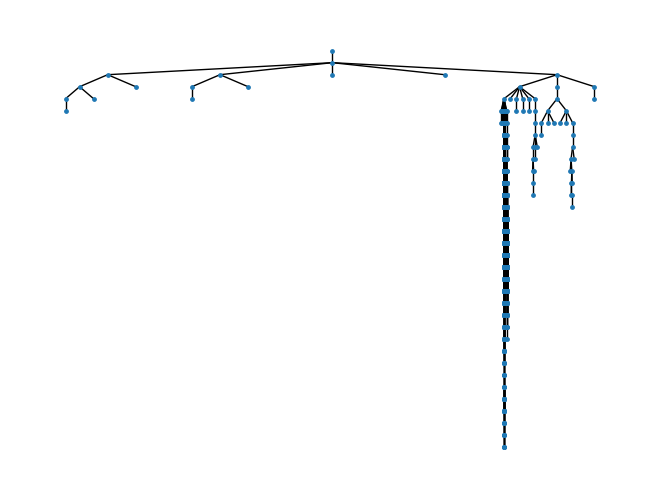

In [422]:
nx.draw(g, pos = hierarchy_pos(g,961), node_size = 6)

In [264]:
bb = o.to_dict()

In [265]:
bb['network_sequences']

{0: 'CARDLDYFDYWCLQGTHQPRTF',
 1: 'CMRYGSSYWYFDVWCLQHGESPYTF',
 2: 'CARDDGYYPYYFDYWCQQSNEDPYTF',
 3: 'CMRYGNYWYFDVWCLQHGESPFTF;CLQHGESPYTF',
 4: 'CMRYSNYWYFDVWCLQHGESPYTF',
 5: 'CMRYPGSSYWYFDVWCLQHGESPYTF',
 6: 'CMRYGSSWYFDVWCLQHGESPYTF',
 7: 'CMRYGSSYWYFDVWCLQHGESPFTF;CLQHGESPYTF',
 8: 'CARDGYDWYFDVWCQQGQSYPFTF',
 9: 'CSTGTGDYWCQNGHSFPLTF',
 10: 'CMRYGNYWYFDVWCLQHGESPFTF',
 11: 'CARDNWDWYFDVWCQQGQSYPLTF',
 12: 'CARDDGYYPYYFDYWCQQSNEDPWTF',
 13: 'CARHVNWEGLAFMDYWCFQGSHVPPTF',
 14: 'CARHYYGRGGHFDVWCHQYHRSPLTF',
 15: 'CTYGTPFAYWCQHHYGTPPEWTF',
 16: 'CMRYGSSYWYFDVWCLQHGESPFTF',
 17: 'CARLTGTSYDAMSHWCQHHYGVPRTF',
 18: 'CARDDYDWYFDVWCQQGQSYPLTF',
 19: 'CAKNEETGVLYYYAMDYWCQQGQSYPFTF',
 20: 'CAILIYYYGSSYEGYFDYWCQQGSSIPFTF',
 21: 'CARWDDSIYWCLQYDEFPYTF',
 22: 'CMRYGYDWYFDVWCLQHGESPYTF',
 23: 'CARDVYGSSWFFDVWCQNGHSFPRTF',
 24: 'CARSYYYTMDYWCQQHYGFPFTF',
 25: 'CARHYYGSSYYFDYWCQQGNTLWTF',
 26: 'CARRGDSLDYWCLQYDNLYTF;CFQGSHVPFTF',
 27: 'CARENGVITTGRFDYWCQQYNSYPLTF',
 28: 'CARDAWDWYFDVWCQQGQSYPLTF'

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
NameError: name 'final_adjacency_matrix' is not defined

In [ ]:
def adjacency_matrix_similarity(mat,
                                pruning_threshold, 
                                remove_singletons):
    
    
    
    return

In [ ]:
def to_networkx():
    
    return 

In [249]:
def calculate_distance_matrix(network_df, distance_function):
    sequences = network_df['network_sequences']
    return distance_function(sequences)
    

In [ ]:
def get_network(VDJ, 
                network_algorithm, #tree or similarity
                sequence_columns,
                distance_function,
                resolve_ties,
                pruning_threshold,
                remove_singletons,
                node_features, 
                germline_columns,
                sequence_limits = (None, None),
                cell_limits = (None, None)):
    
   
    network_df = get_network_dataframe(VDJ, **kwargs)
    
    distance_matrix = calculate_distance_matrix()
    
    if network_algorithm == 'tree':
        adjacency_matrix = adjacency_matrix_tree(network_df, distance_matrix, **kwargs)
        
    elif network_algorithm == 'similarity':
        adjacency_matrix = adjacency_matrix_similarity(network_df, distance_matrix, **kwargs)

    else:
        raise ValueError('Network algorithm not recognized: please select either tree or similarity')

In [ ]:
def AntibodyForests(VDJ, 
                    ncores, 
                    **kwargs):
    

In [ ]:
def plot_AntibodyForests():
    

In [412]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

### Clonal lineage inference using Biopython and PHYLIP <a class="anchor" id="section_3_4"></a>

### Converting a lineage into a network using *networkx* <a class="anchor" id="section_3_5"></a>

### Creating sequence similarity networks using *networkx* <a class="anchor" id="section_3_6"></a>


### Using *bionumpy* for quickly calculating kmer frequencies <a class="anchor" id="section_3_7"></a>


### Clustering and projection using *scikit-learn* <a class="anchor" id="section_3_8"></a>


### Training baseline ML models using *scikit-learn* <a class="anchor" id="section_3_9"></a>


## GEX analyses <a class="anchor" id="chapter4"></a>
## TO DO


In [ ]:
!pip install scvelo --upgrade --quiet

#sc.tl.pca(GEX, svd_solver='arpack')
#sc.pp.neighbors(GEX, n_neighbors=4, n_pcs=20)
sc.tl.louvain(GEX, resolution=1.0)
sc.tl.paga(GEX, groups='louvain')
sc.pl.paga(GEX, color=['louvain'])

### Sample GEX analyses using *Scanpy* <a class="anchor" id="section_4_1"></a>


### Creating RNA velocity plots <a class="anchor" id="section_4_2"></a>



### Integrating VDJ information  <a class="anchor" id="section_4_3"></a>

